In [1]:
import tensorflow as tf

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import BatchNormalization, MaxPooling2D

In [3]:
# load in the data
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()
print("x_train.shape:", x_train.shape)
print("y_train,shape:", y_train.shape)

170498071/170498071 [==============================] - 13s 0us/step
x_train.shape: (50000, 32, 32, 3)
y_train,shape: (50000,)


In [4]:
# number of classes
K = len(set(y_train))
print("number of classes:", K)

number of classes: 10


In [5]:
# build model using functional API
i = Input(shape=x_train[0].shape)
#x = Conv2D(32, (3, 3), strides=2, activation='relu')(i) # conv layer 1, stride=2 images twice small after each layer
#x = Conv2D(64, (3, 3), strides=2, activation='relu')(x) # conv layer 2
#x = Conv2D(128, (3, 3), strides=2, activation='relu')(x) # conv layer 3

x = Conv2D(32, (3, 3), strides=2, activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), strides=2, activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)
x = Conv2D(64, (3, 3), strides=2, activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), strides=2, activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)
x = Conv2D(128, (3, 3), strides=2, activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), strides=2, activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = Flatten()(x) # converts the image into a feature vector
x = Dropout(0.2)(x) #0.5
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [7]:
# compile and fit
# use the GPU
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=["accuracy"])
#r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

In [8]:
# with data augmentation
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(x_train, y_train, batch_size)
steps_per_epoch = x_train.shape[0] // batch_size
r = model.fit_generator(train_generator, validation_data=(x_test, y_test), steps_per_epoch=steps_per_epoch, epochs=50)

Epoch 1/50


<ipython-input-8-42d1e6ca4e83>:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(train_generator, validation_data=(x_test, y_test), steps_per_epoch=steps_per_epoch, epochs=50)


1562/1562 [==============================] - 41s 20ms/step - loss: 1.5149 - accuracy: 0.4684 - val_loss: 1.4423 - val_accuracy: 0.4814
Epoch 2/50
1562/1562 [==============================] - 29s 19ms/step - loss: 1.3128 - accuracy: 0.5366 - val_loss: 1.2469 - val_accuracy: 0.5556
Epoch 3/50
1562/1562 [==============================] - 31s 20ms/step - loss: 1.2315 - accuracy: 0.5644 - val_loss: 1.1062 - val_accuracy: 0.6120
Epoch 4/50
1562/1562 [==============================] - 30s 19ms/step - loss: 1.1782 - accuracy: 0.5857 - val_loss: 1.0894 - val_accuracy: 0.6183
Epoch 5/50
1562/1562 [==============================] - 31s 20ms/step - loss: 1.1321 - accuracy: 0.6020 - val_loss: 1.1156 - val_accuracy: 0.6132
Epoch 6/50
1562/1562 [==============================] - 31s 20ms/step - loss: 1.1001 - accuracy: 0.6147 - val_loss: 0.9917 - val_accuracy: 0.6495
Epoch 7/50
1562/1562 [==============================] - 30s 19ms/step - loss: 1.0674 - accuracy: 0.6275 - val_loss: 1.2687 - val_accura

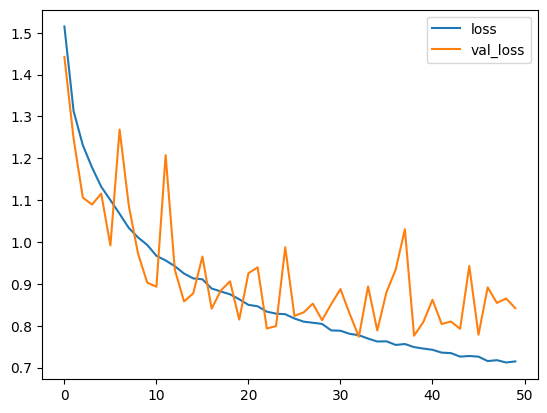

In [9]:
# plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

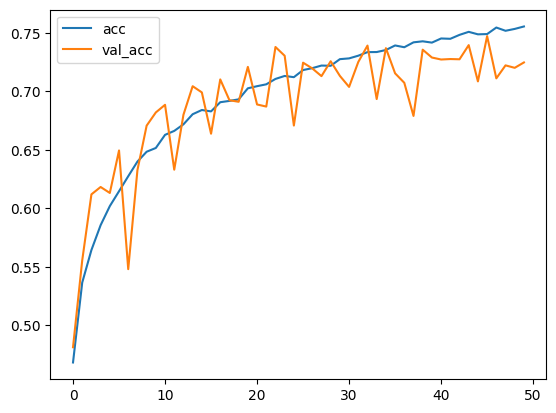

In [10]:
# plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'],label='val_acc')
plt.legend()

313/313 [==============================] - 1s 2ms/step
Confusion matrix, whitout normalization
[[815  23  21   8  17   4   8  14  46  44]
 [ 12 864   2   4   0   0   9   2  21  86]
 [ 66   5 523  45  99  63  95  56  13  35]
 [ 16  16  42 524  61 152  81  46  22  40]
 [ 25   2  32  46 689  25  94  65  10  12]
 [ 17   9  23 155  40 591  57  69  11  28]
 [  7   3  10  41  25  14 878   5   4  13]
 [ 18   4  11  22  36  36  13 817   5  38]
 [ 52  23   4   9   3   6   4   5 854  40]
 [ 21  67   3  11   1   1   1  12  12 871]]


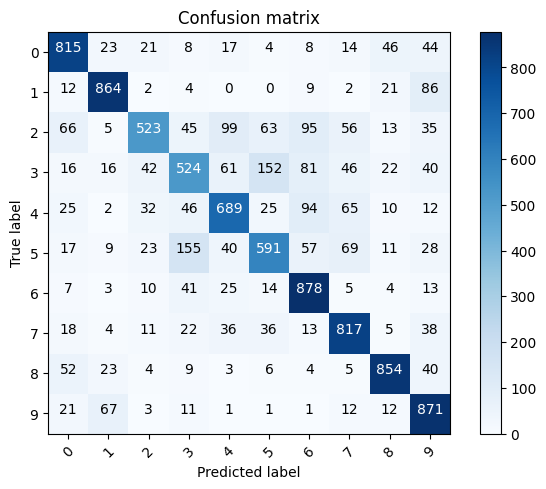

In [19]:
# plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting "normalize=True".
  """
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix")
  else:
    print("Confusion matrix, whitout normalization")

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
              horizontalalignment='center',
              color='white' if cm[i, j] > thresh else 'black')

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test,p_test)
plot_confusion_matrix(cm, list(range(10)))



In [20]:
# label mapping
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

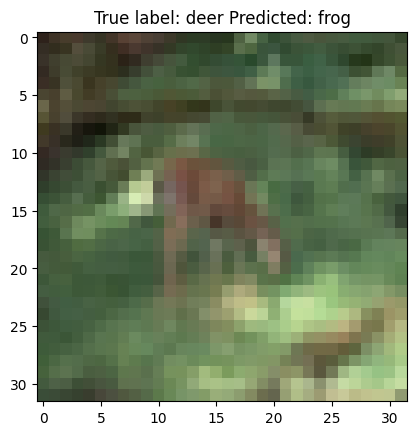

In [21]:
# show some missclassified examples
missclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(missclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title('True label: %s Predicted: %s' % (labels[y_test[i]], labels[p_test[i]]));